# baseline

In [1]:
import xarray as xr
import matplotlib.pyplot as plt

In [2]:
zarr_store = "/path/to/zarr/store"

In [3]:
# Parameters
zarr_store = "/global/cfs/projectdirs/m4746/Projects/Ocean-CDR-Atlas-v0/data/validation/smyle.cdr-atlas-v0.control.001.validation.zarr"


In [4]:
%%time
ds_o = xr.open_zarr(zarr_store).compute()
ds_o

CPU times: user 730 ms, sys: 442 ms, total: 1.17 s
Wall time: 1.24 s


<xarray.Dataset> Size: 19MB
Dimensions:            (nlat: 384, nlon: 320, time: 192)
Coordinates:
    TLAT               float64 8B -79.22
    TLONG              float64 8B 320.6
    ULAT               float64 8B -78.95
    ULONG              float64 8B 321.1
  * time               (time) object 2kB 0347-02-01 00:00:00 ... 0363-01-01 0...
    z_t                float32 4B 500.0
    z_t_150m           float32 4B 500.0
    z_w_top            float32 4B 9e+03
Dimensions without coordinates: nlat, nlon
Data variables: (12/78)
    ALK_ALT_CO2_diff   (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    ALK_ALT_CO2_rmse   (time) float64 2kB 0.05481 0.1497 ... 0.108 0.08708
    ALK_diff           (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    ALK_rmse           (time) float64 2kB 0.05481 0.1497 ... 0.108 0.08708
    DIC_ALT_CO2_diff   (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    DIC_ALT_CO2_rmse   (time) float64 2kB 0.05865 0.1485 ... 0.1816 0.1527
    ...                 ...
    spFe_diff          (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    spFe_rmse          (time) float64 2kB 4.438e-08 9.004e-08 ... 1.47e-07
    spP_diff           (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    spP_rmse           (time) float64 2kB 1.02e-05 2.451e-05 ... 0.0002156
    zooC_diff          (nlat, nlon) float32 492kB nan nan nan ... nan nan nan
    zooC_rmse          (time) float64 2kB 0.0006193 0.002225 ... 0.009189

In [5]:
variables = [v[:-5] for v in ds_o.variables if "_rmse" in v]

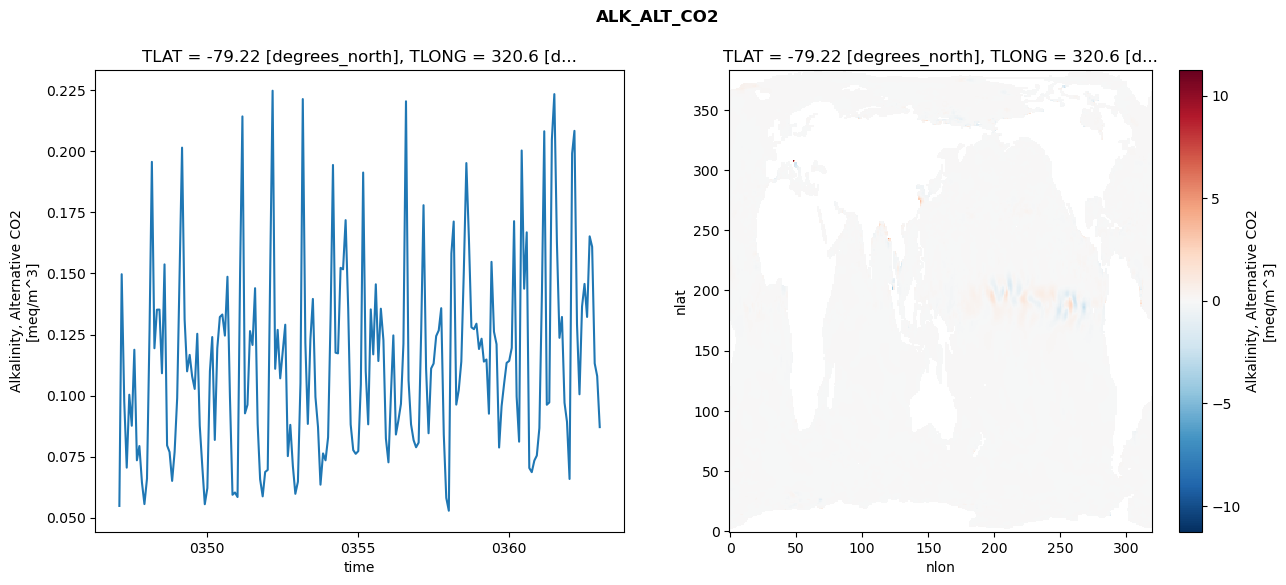

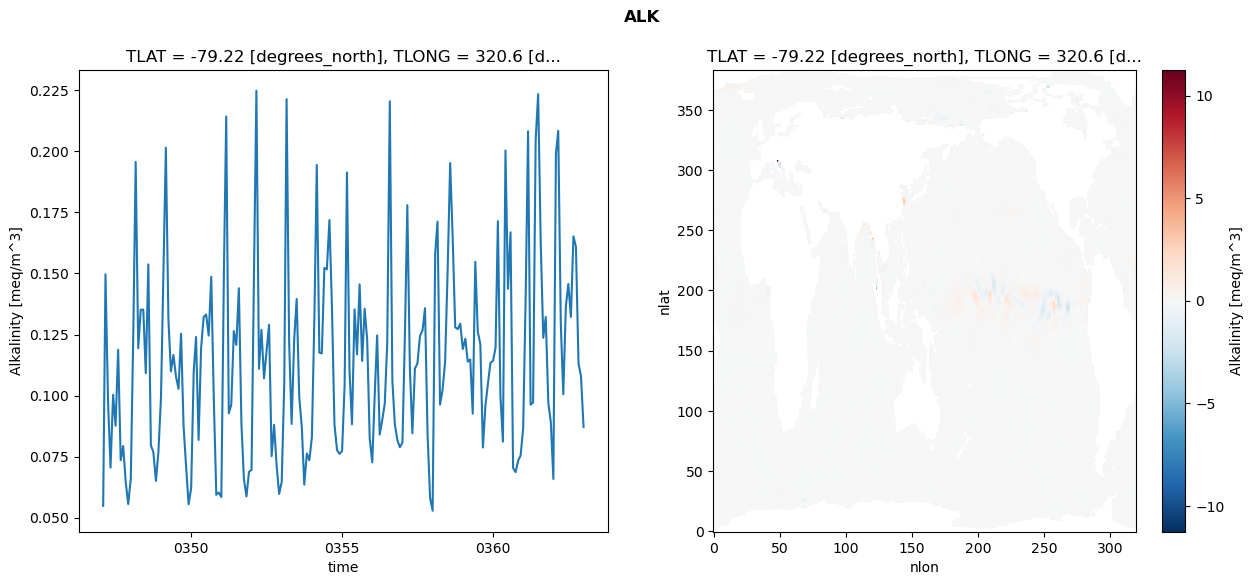

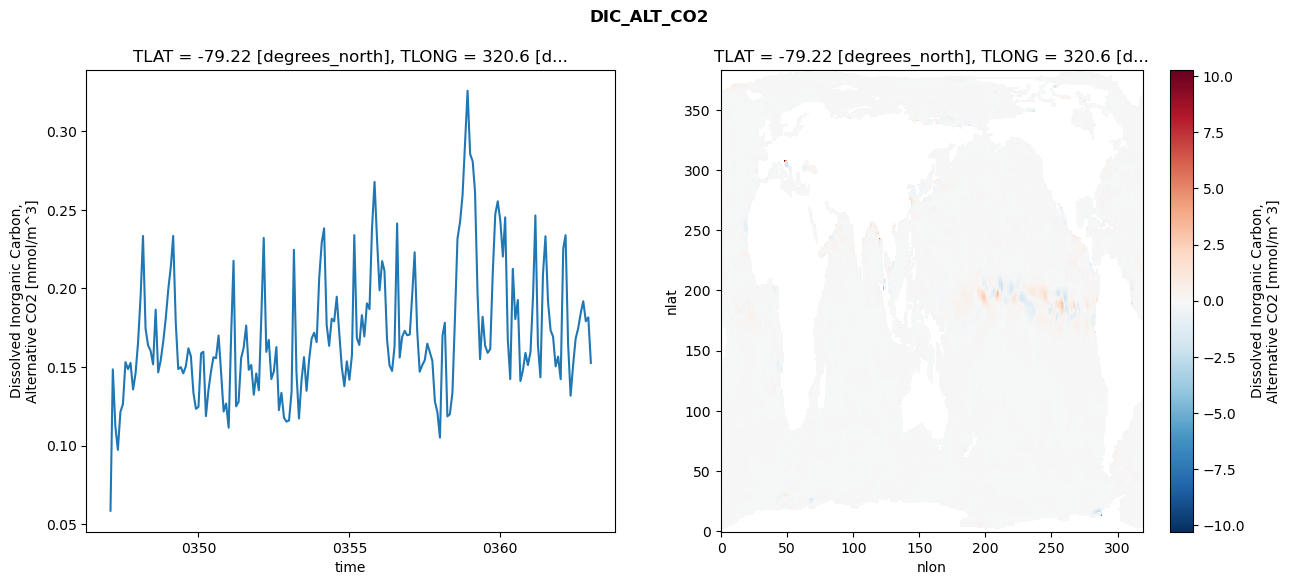

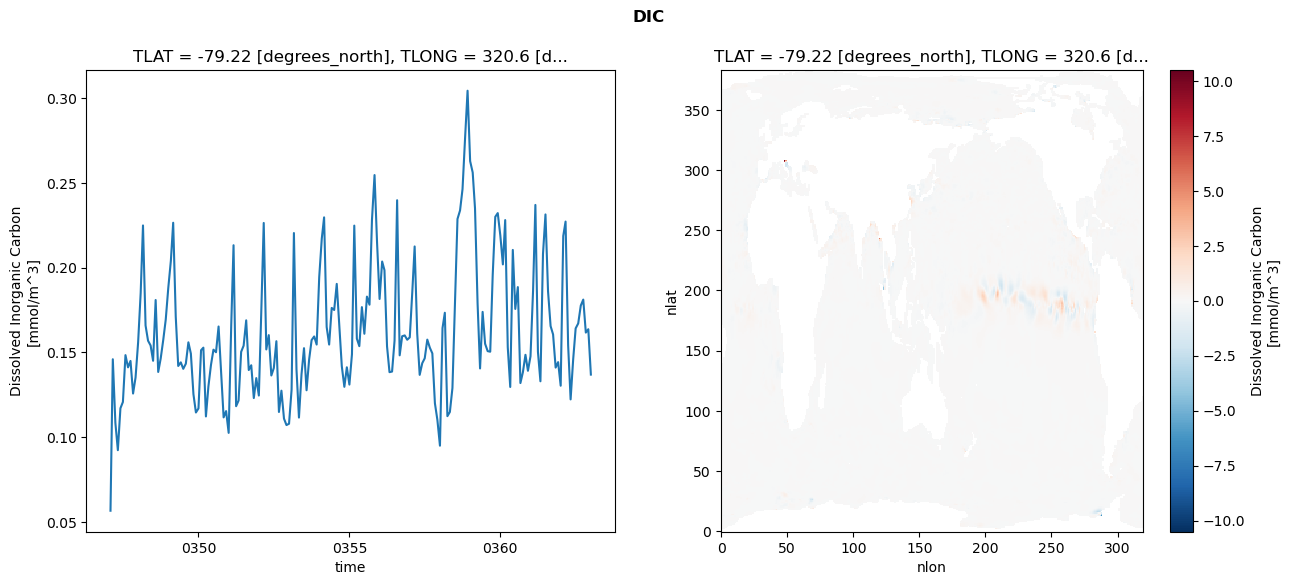

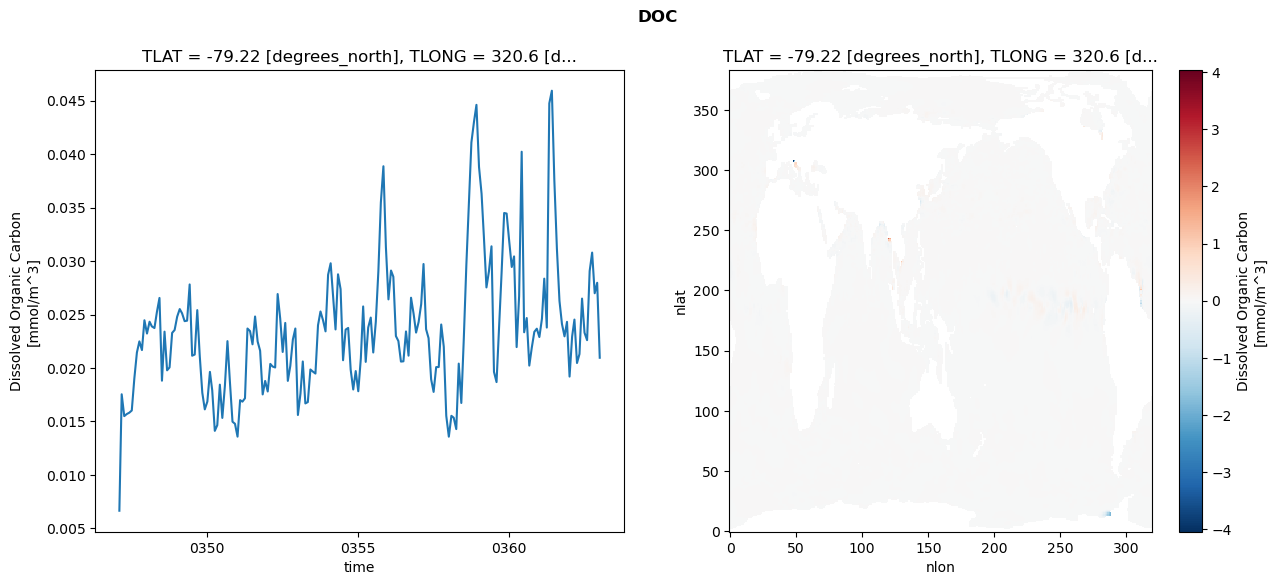

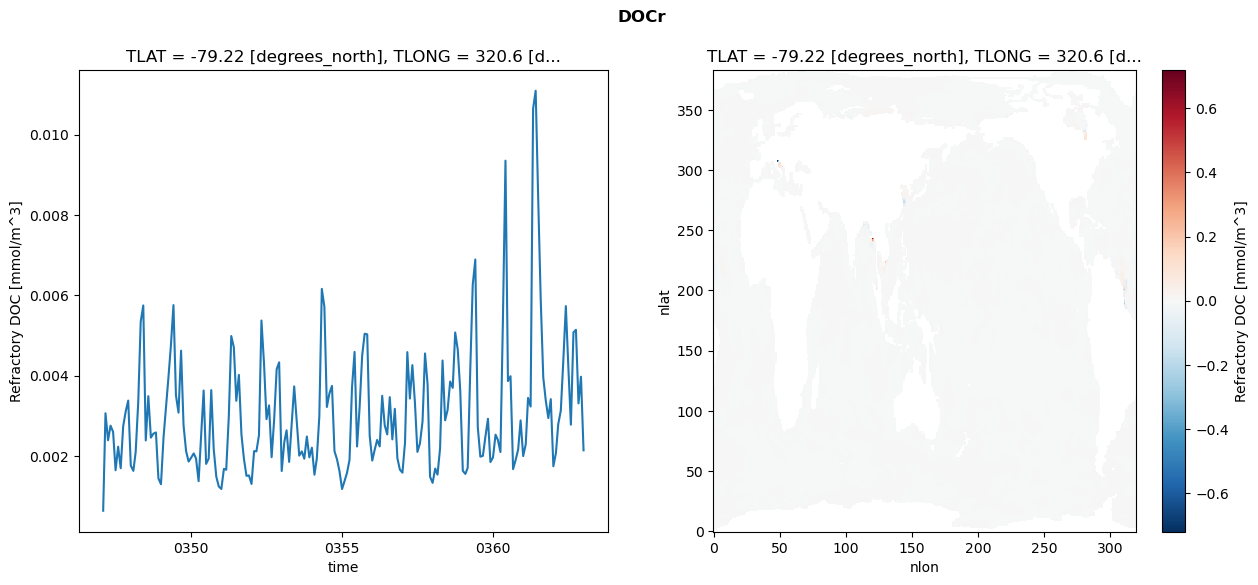

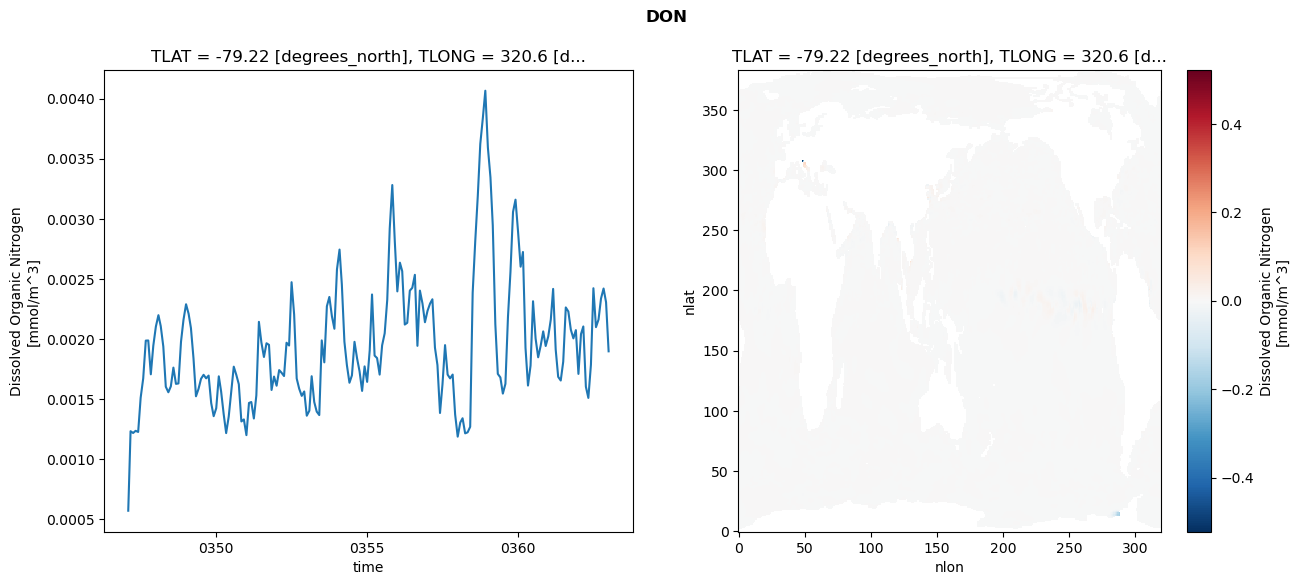

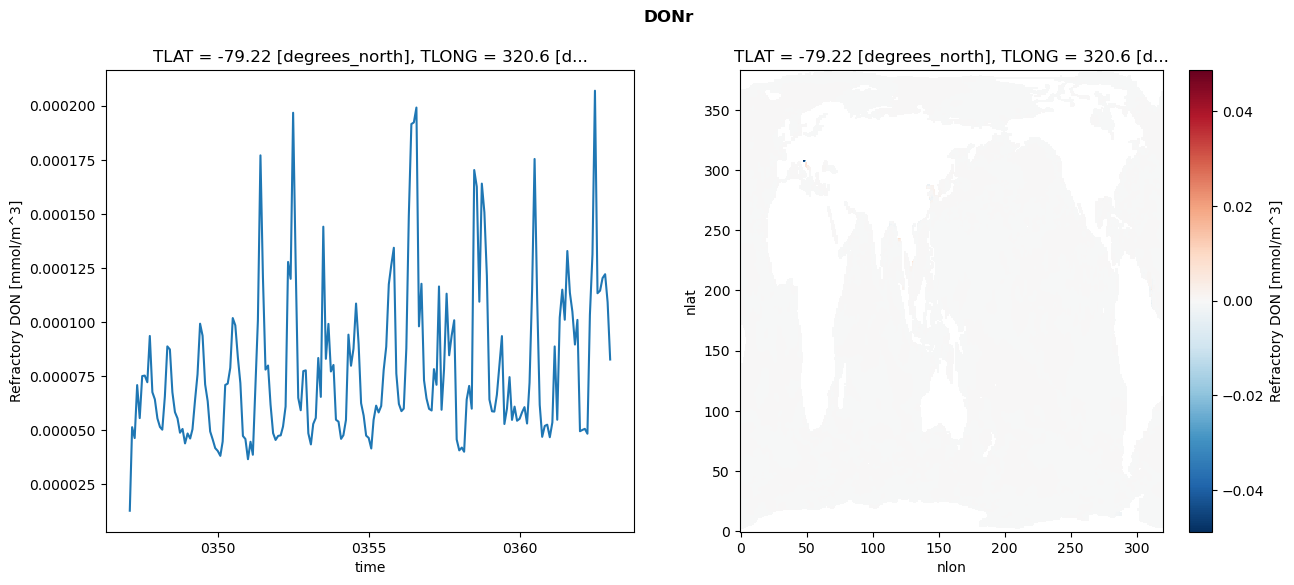

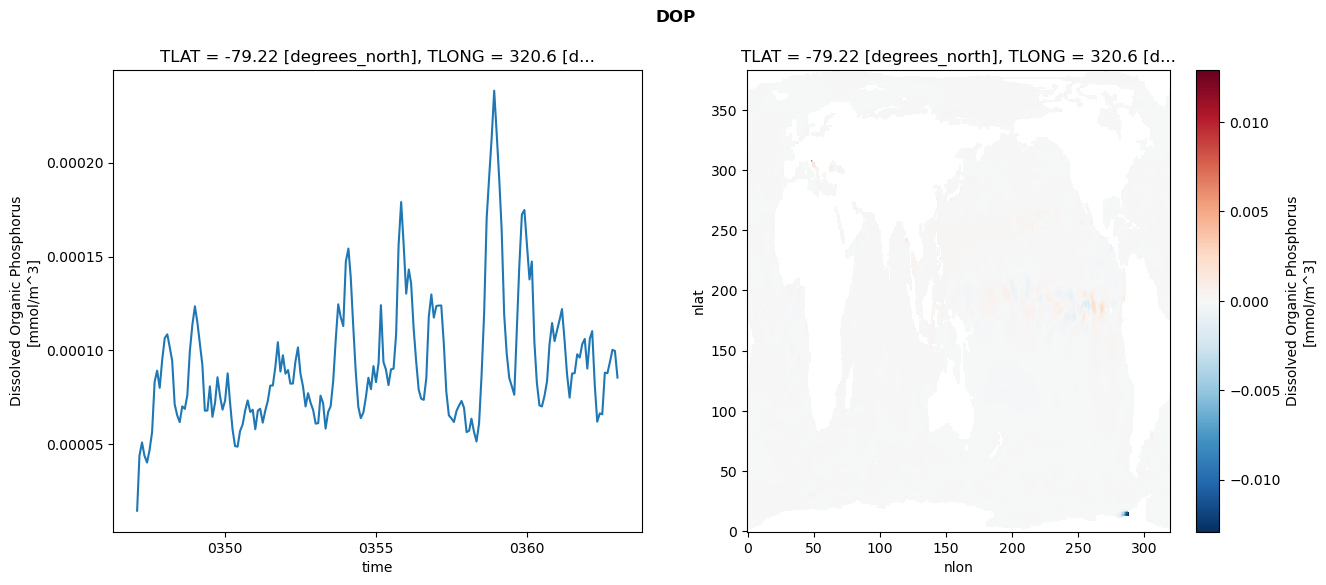

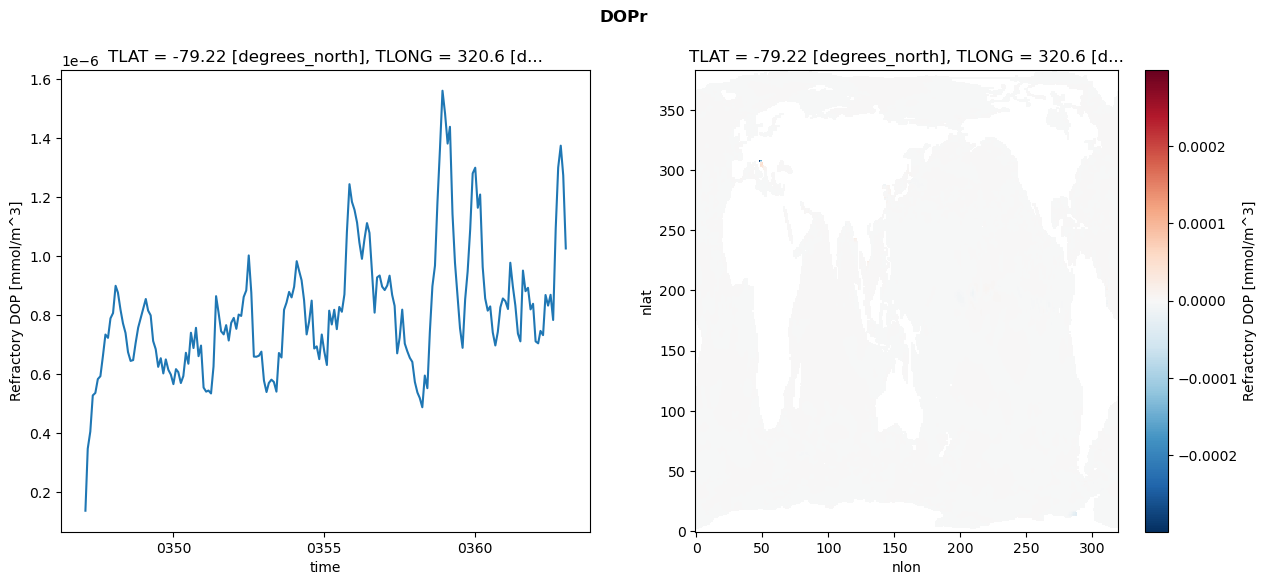

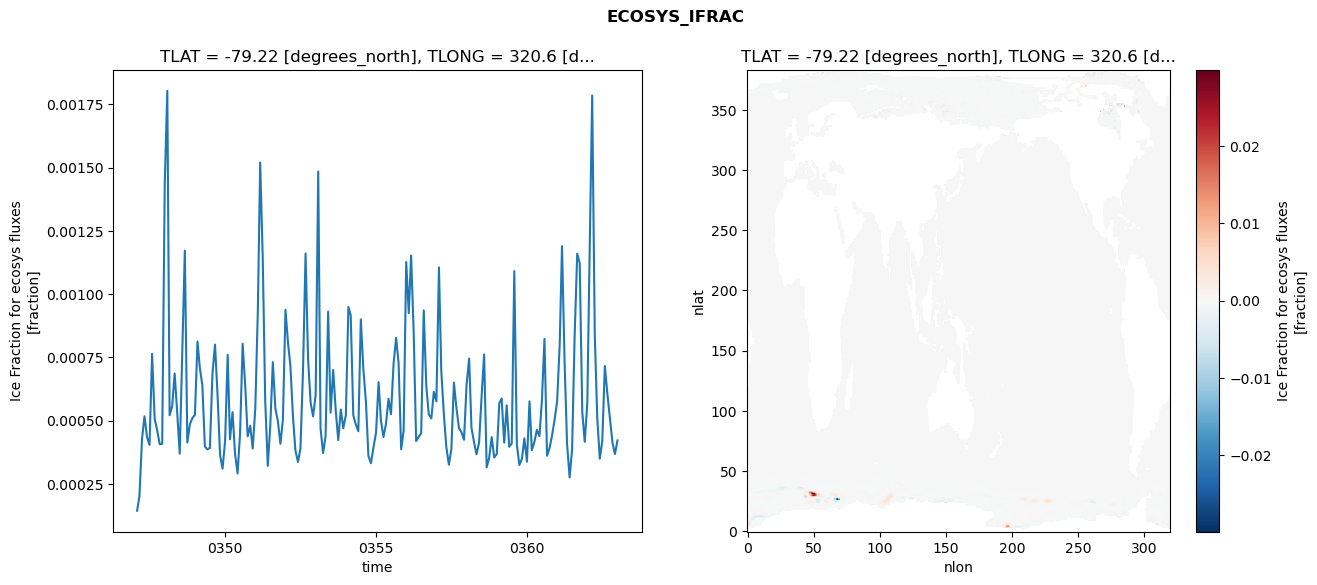

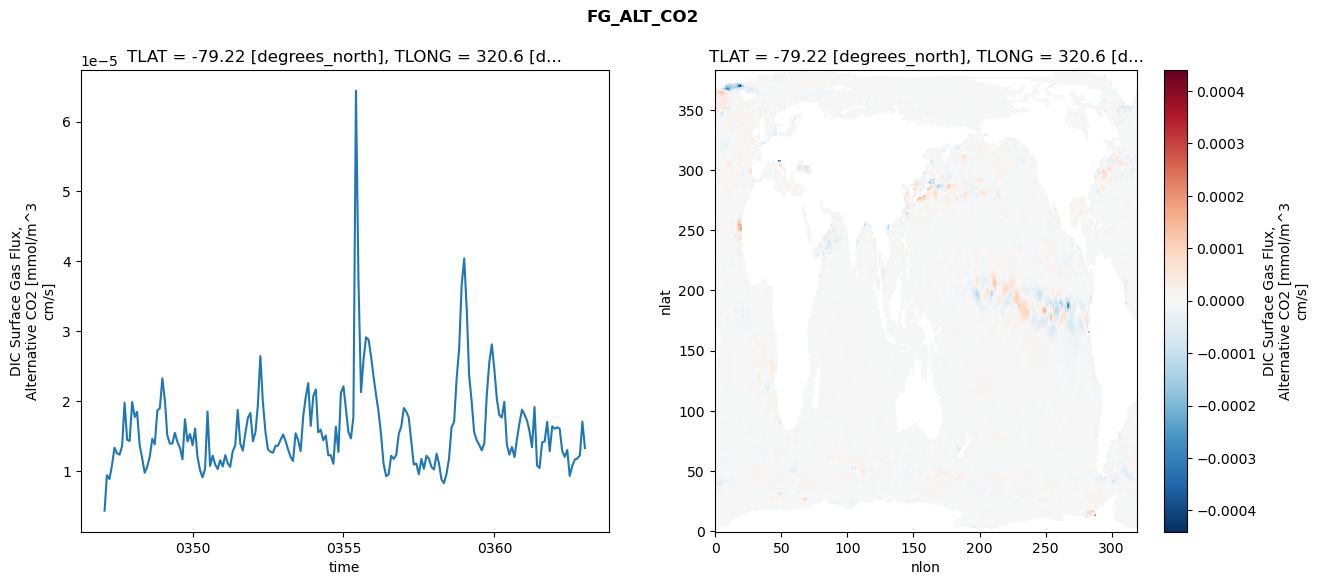

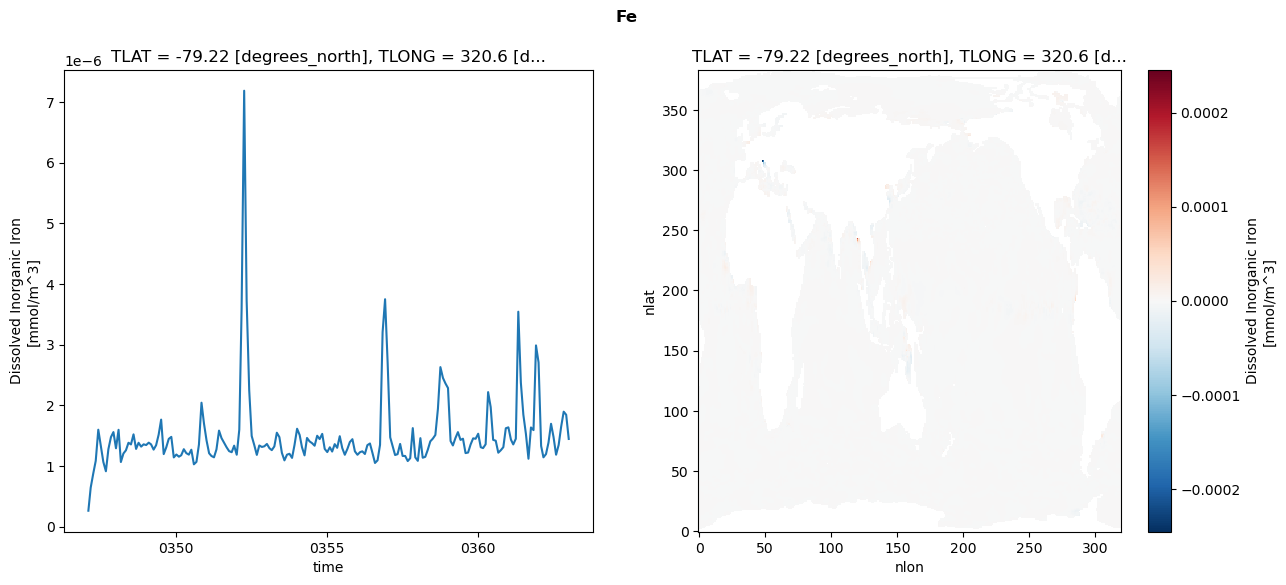

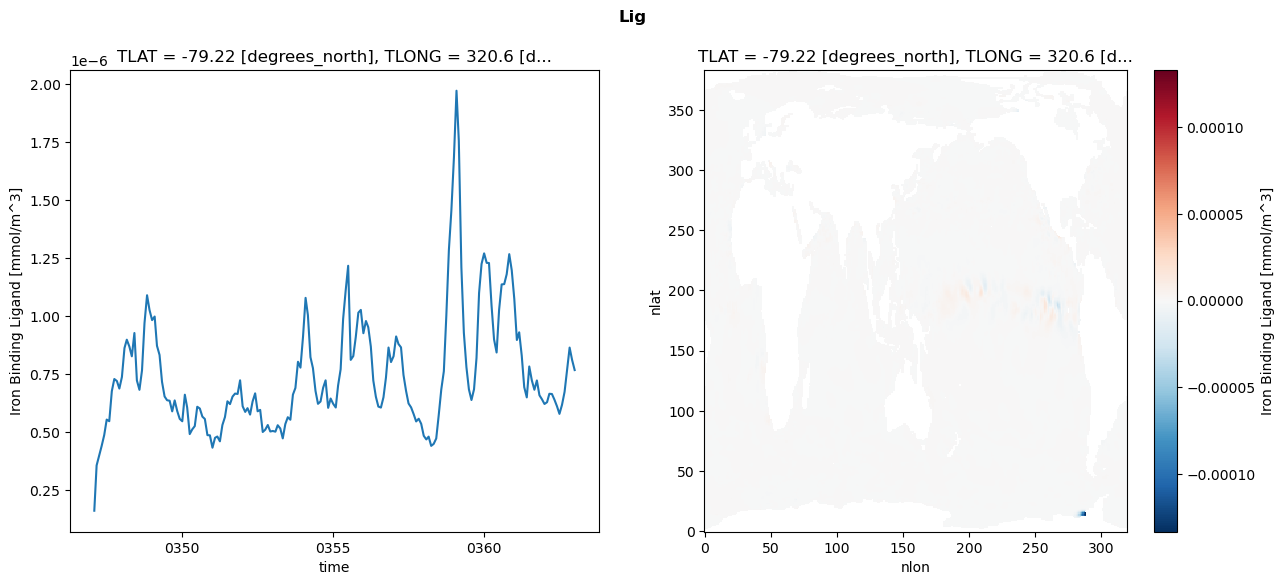

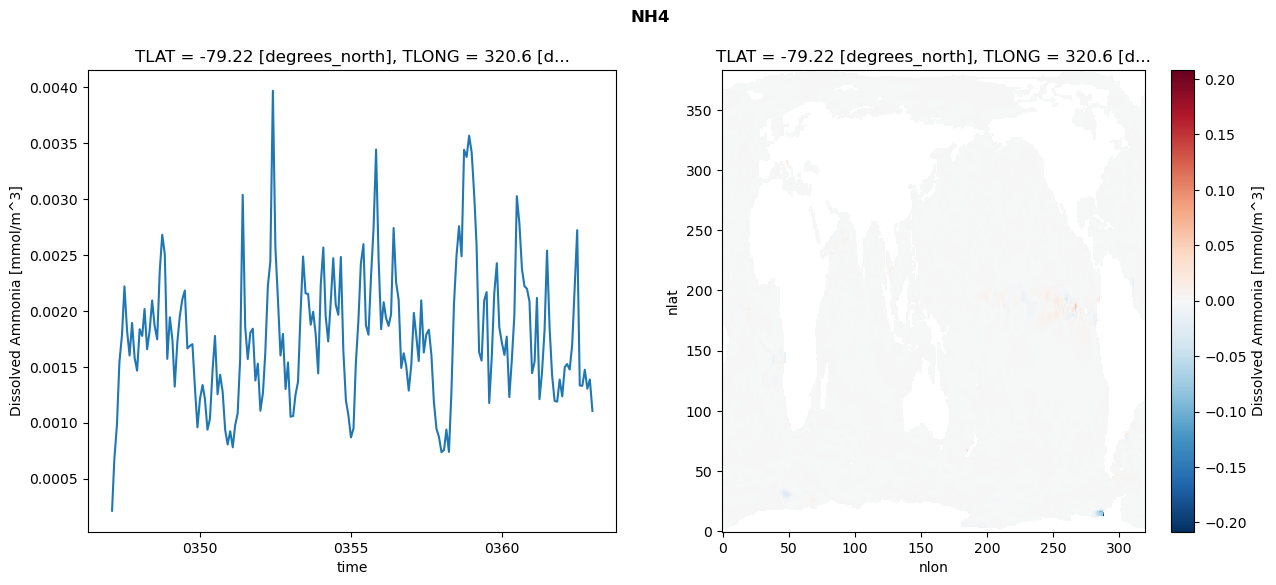

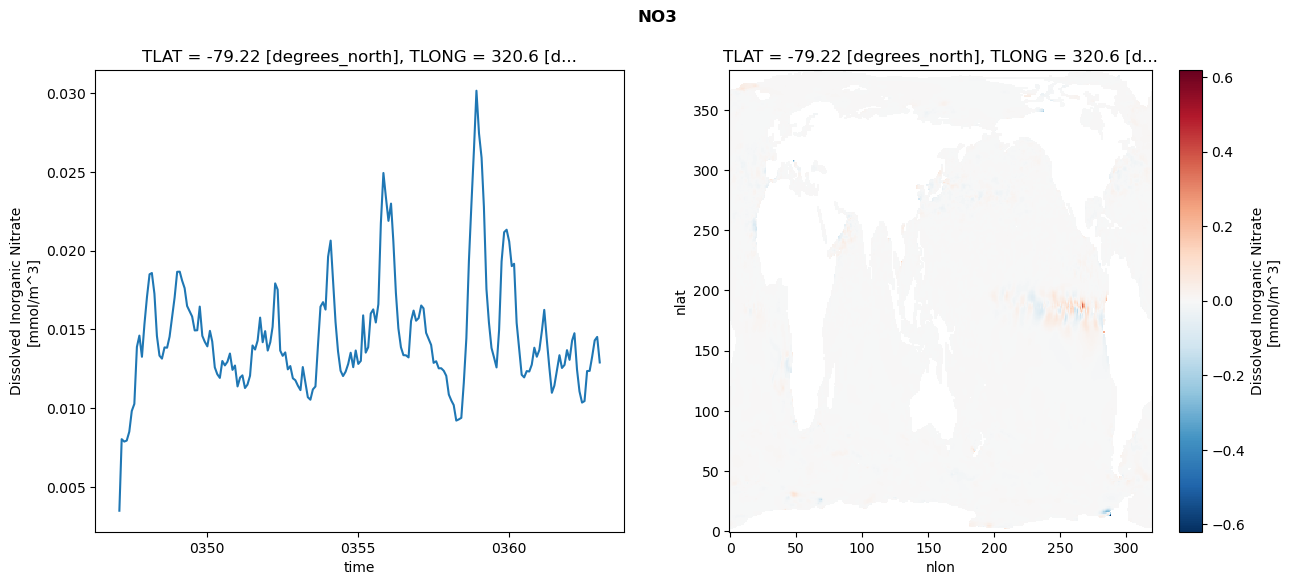

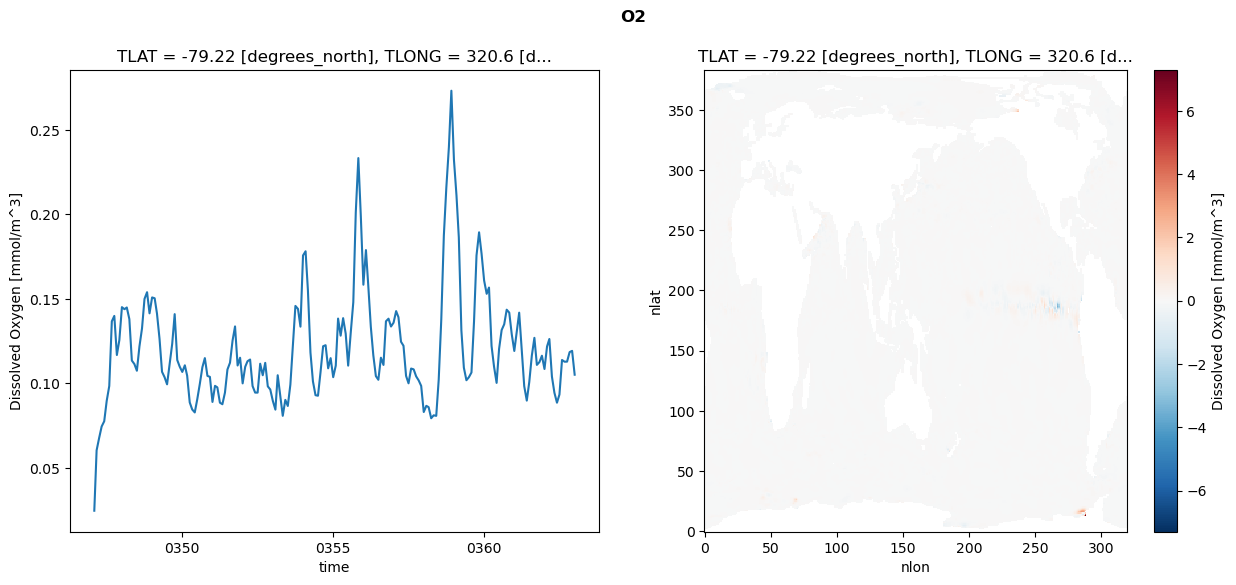

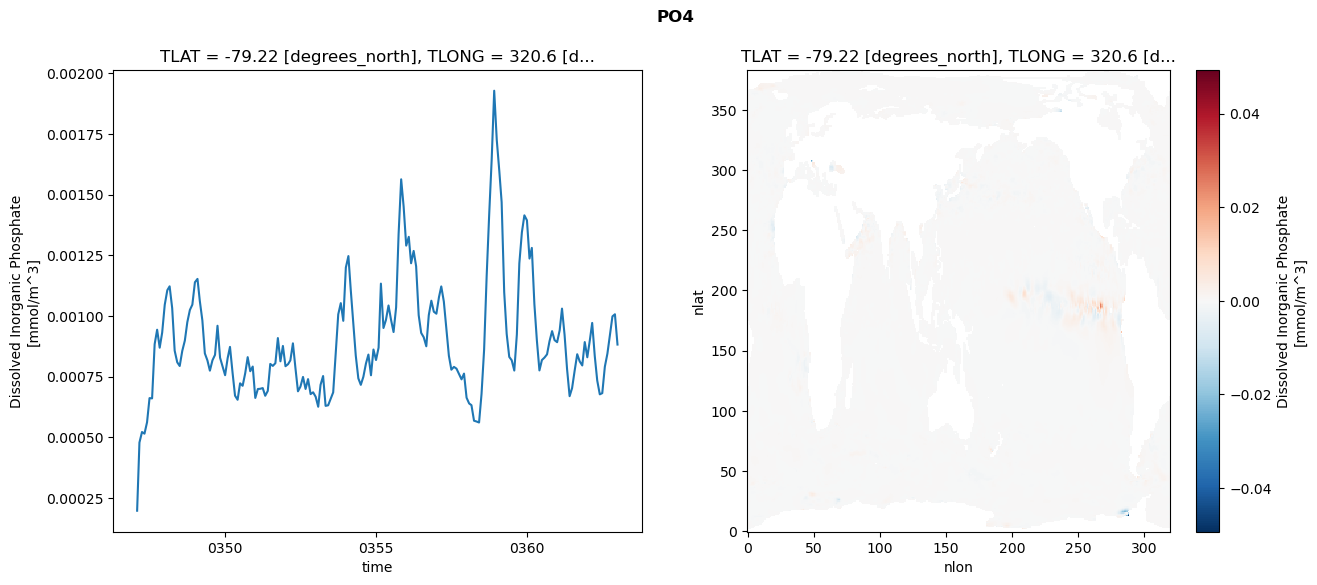

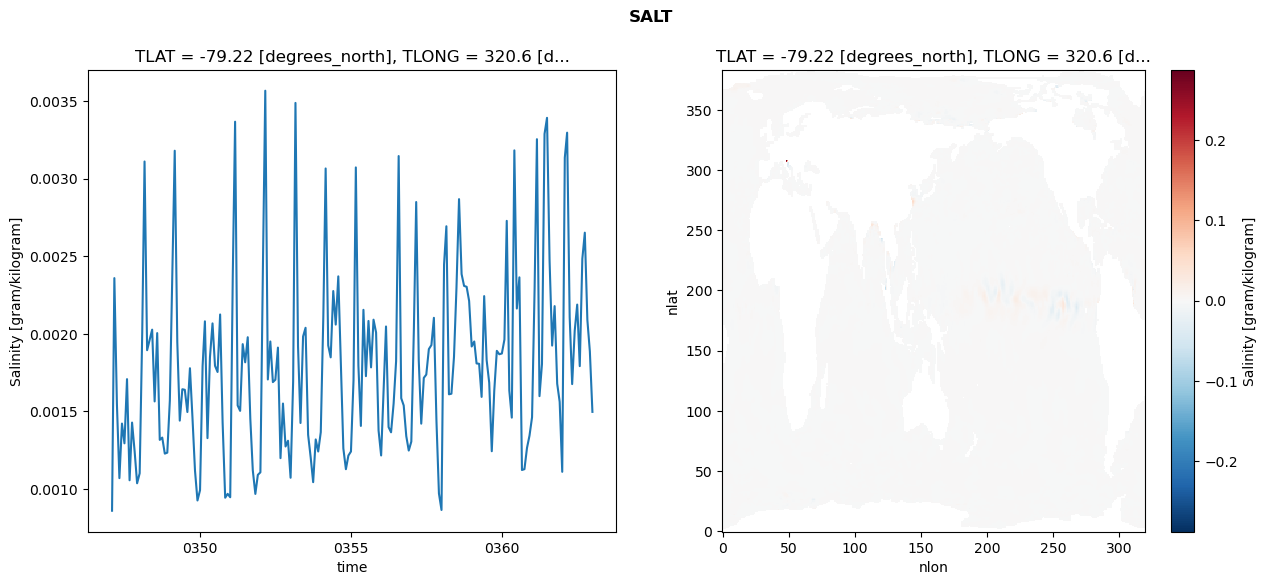

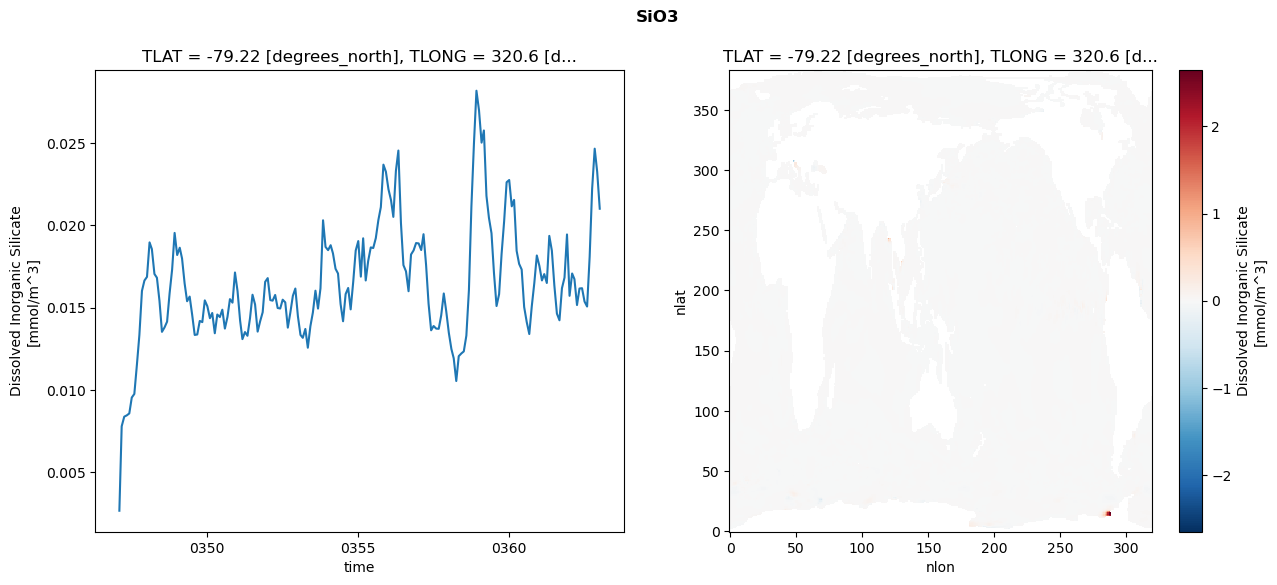

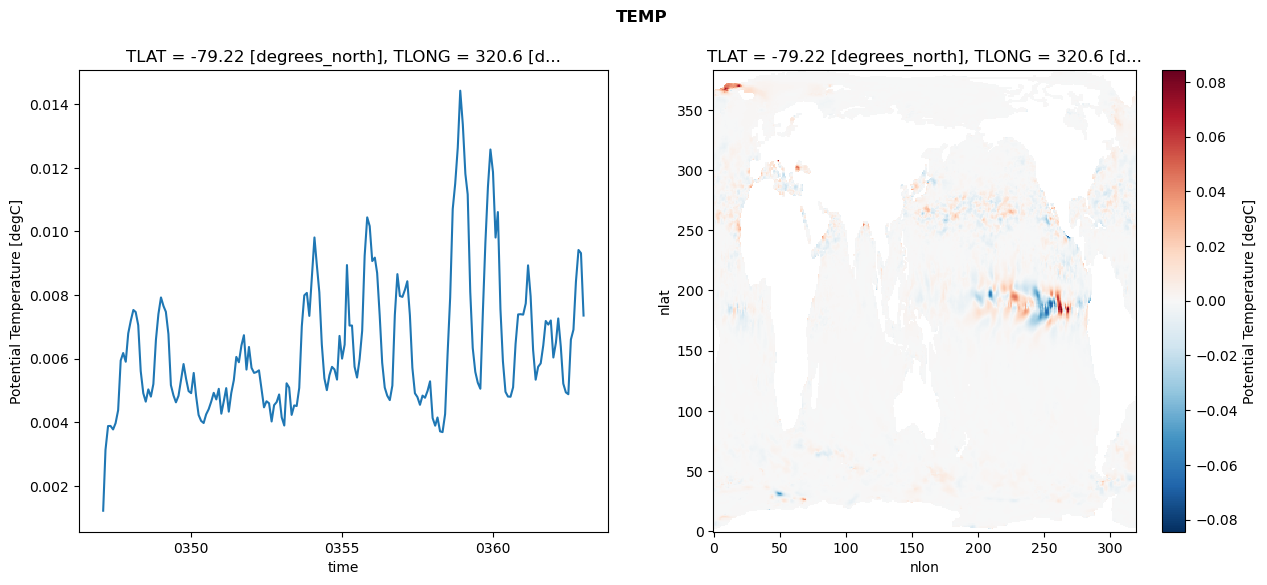

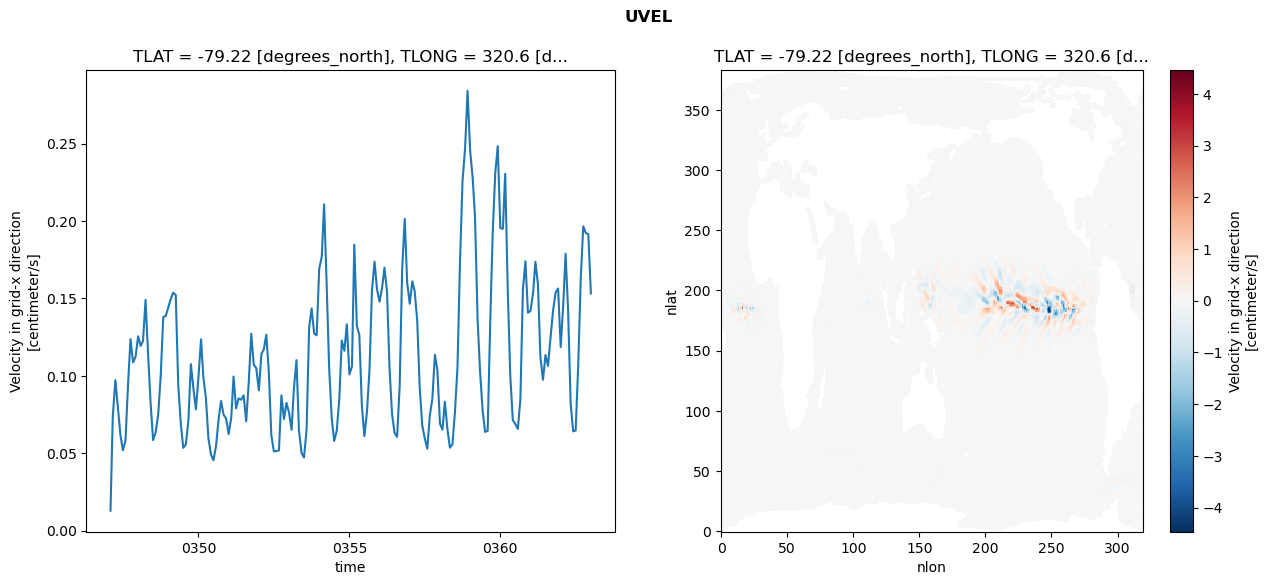

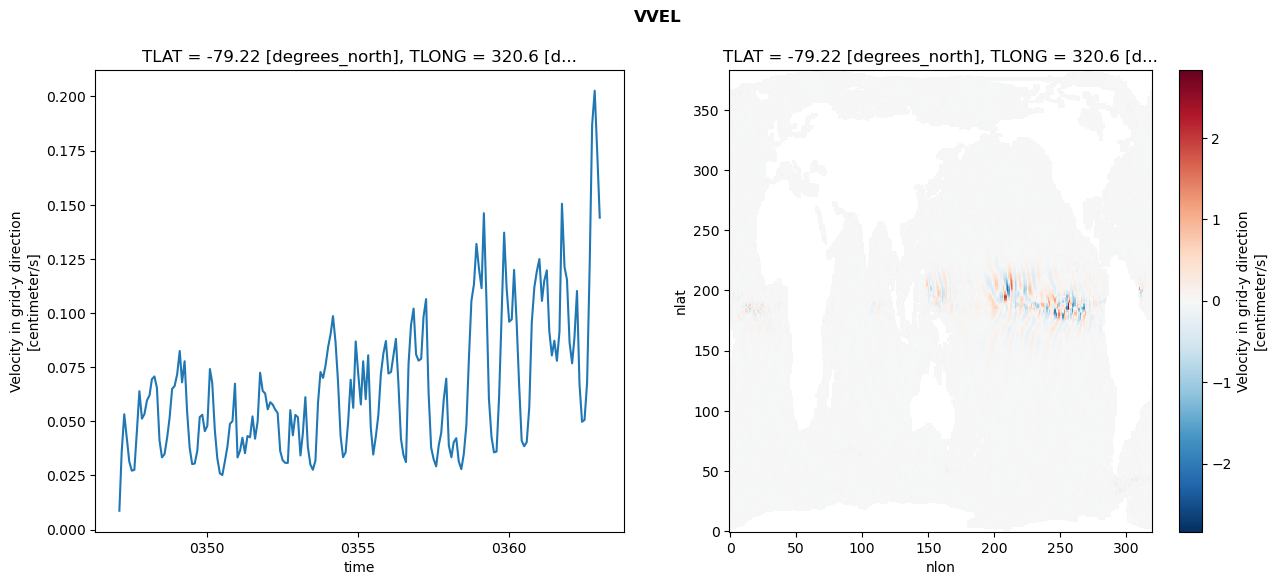

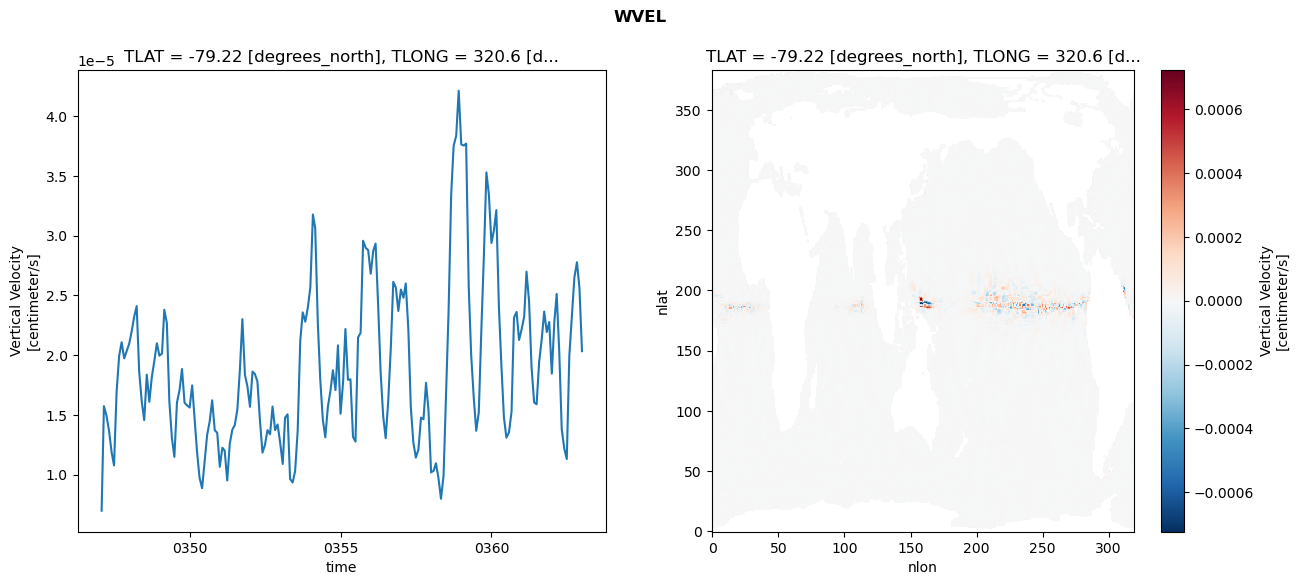

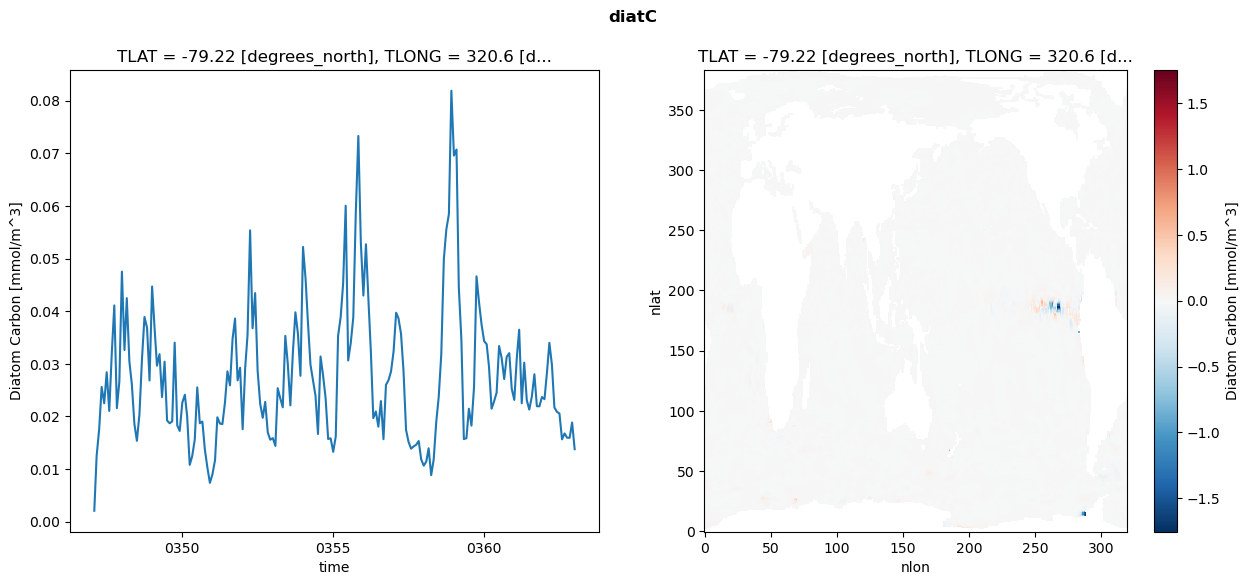

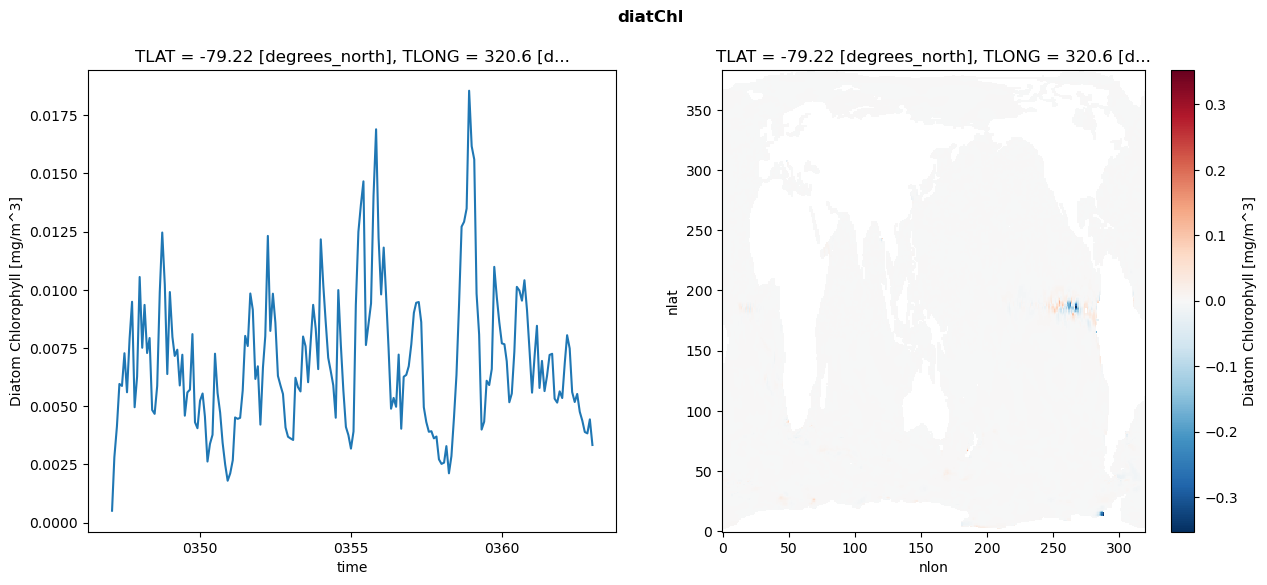

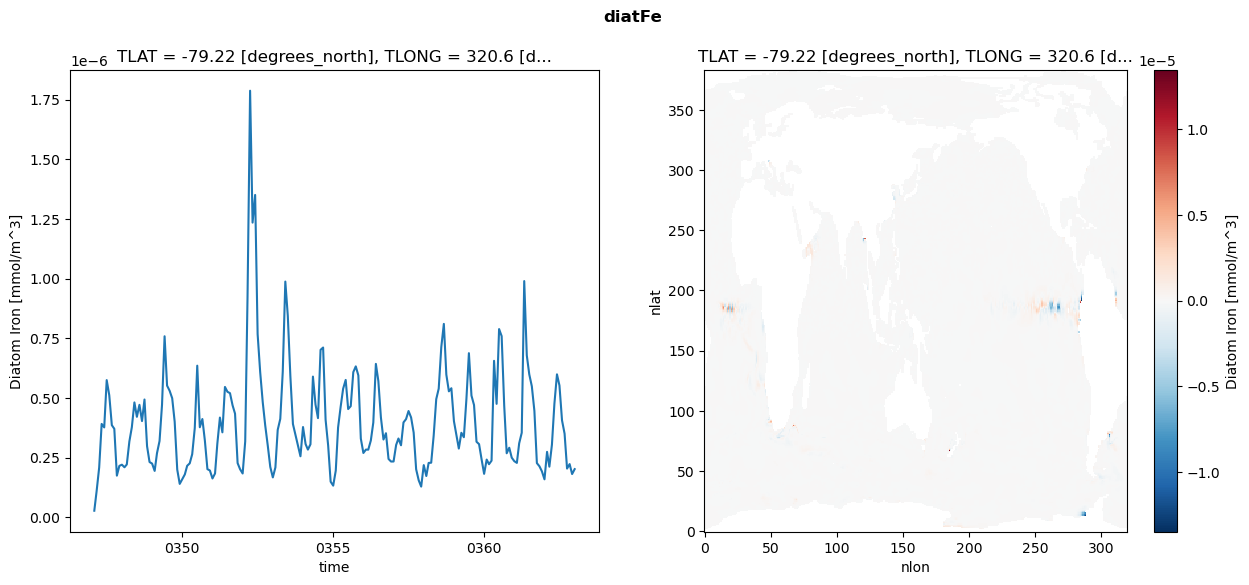

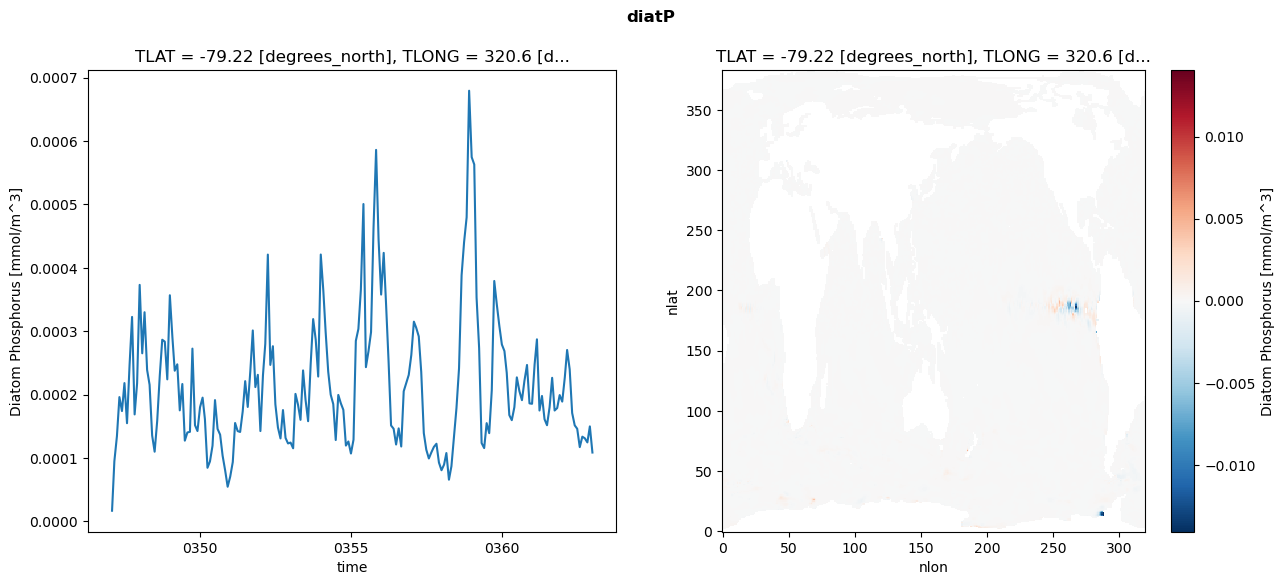

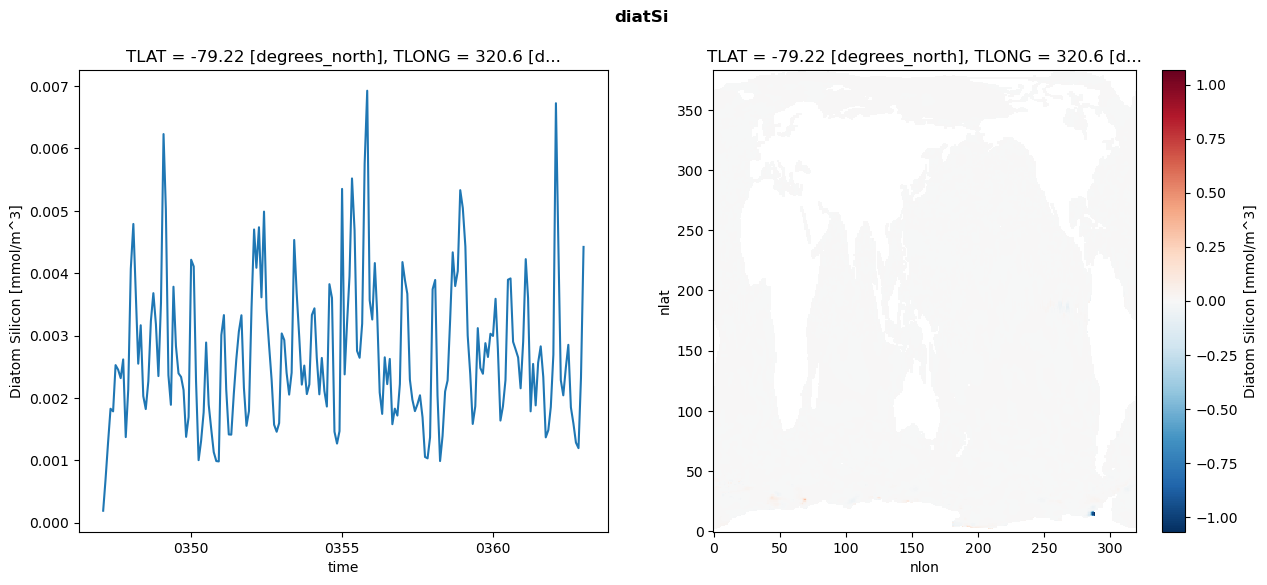

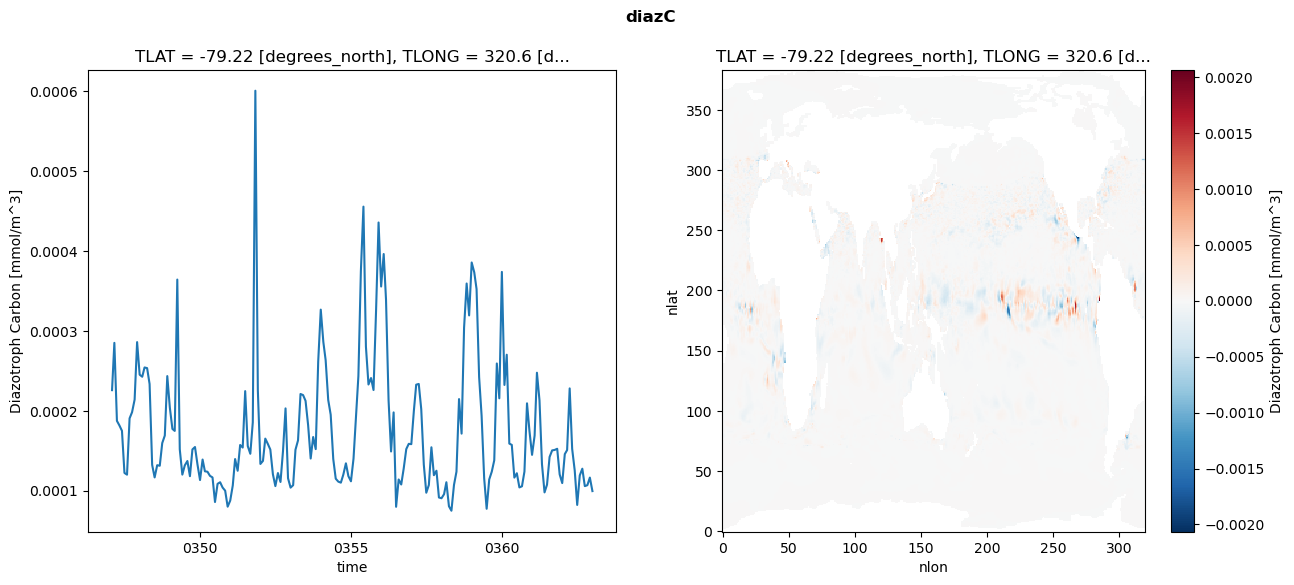

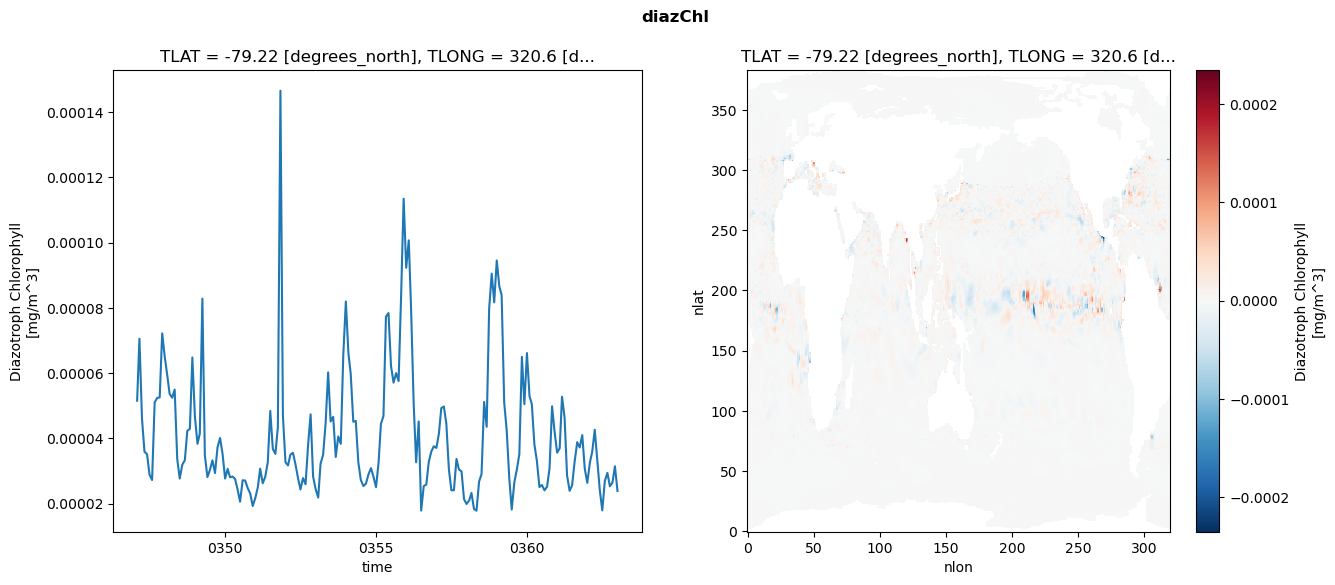

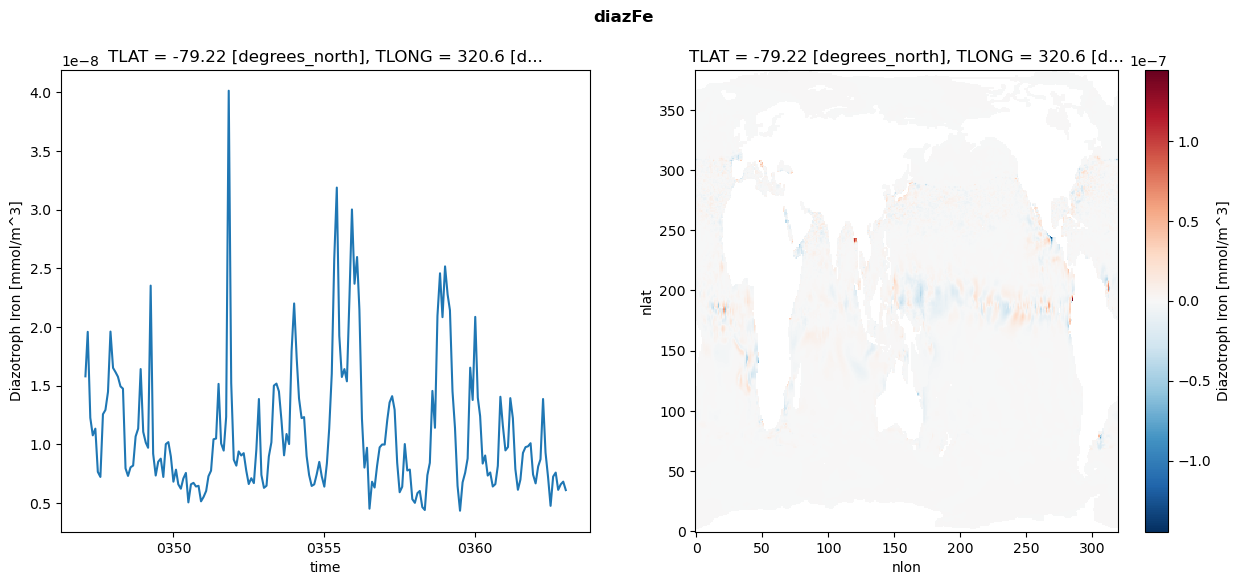

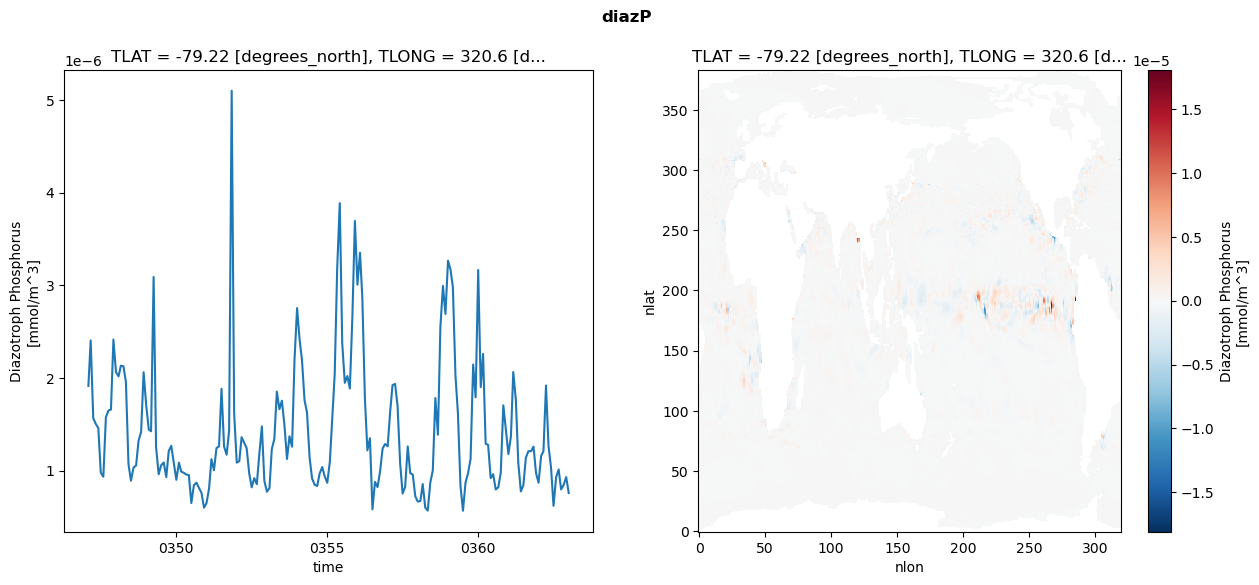

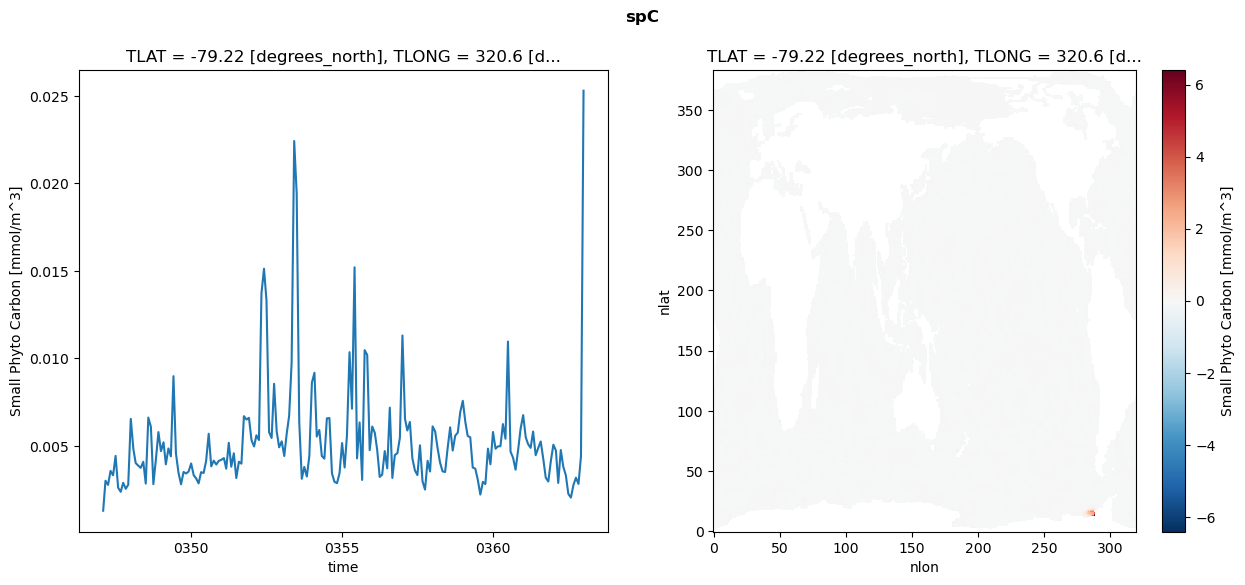

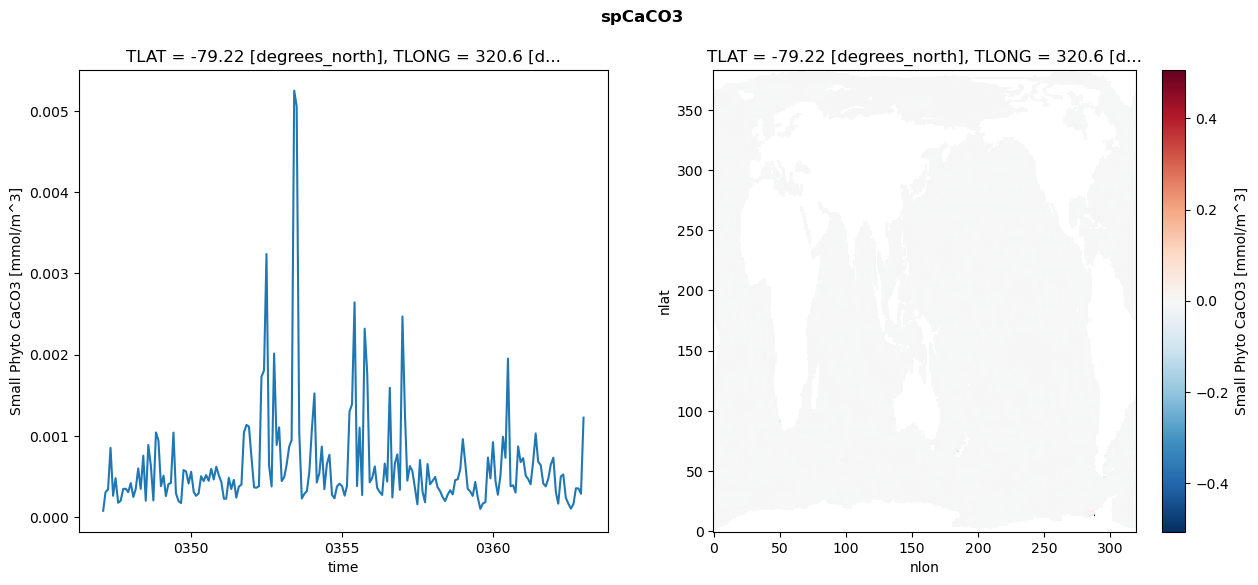

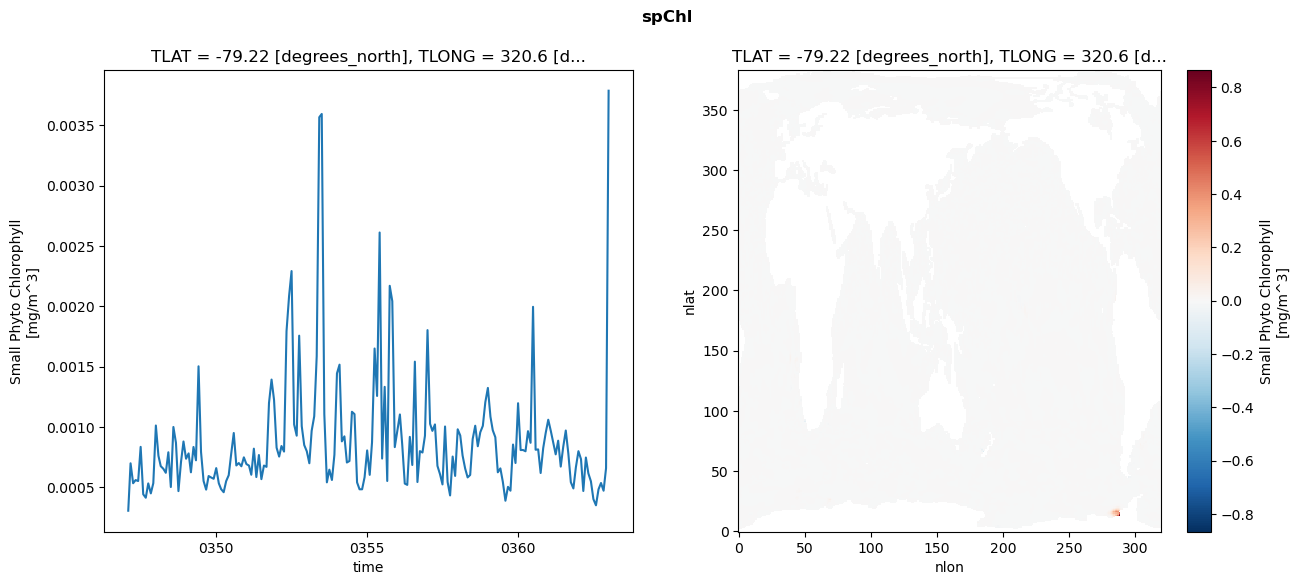

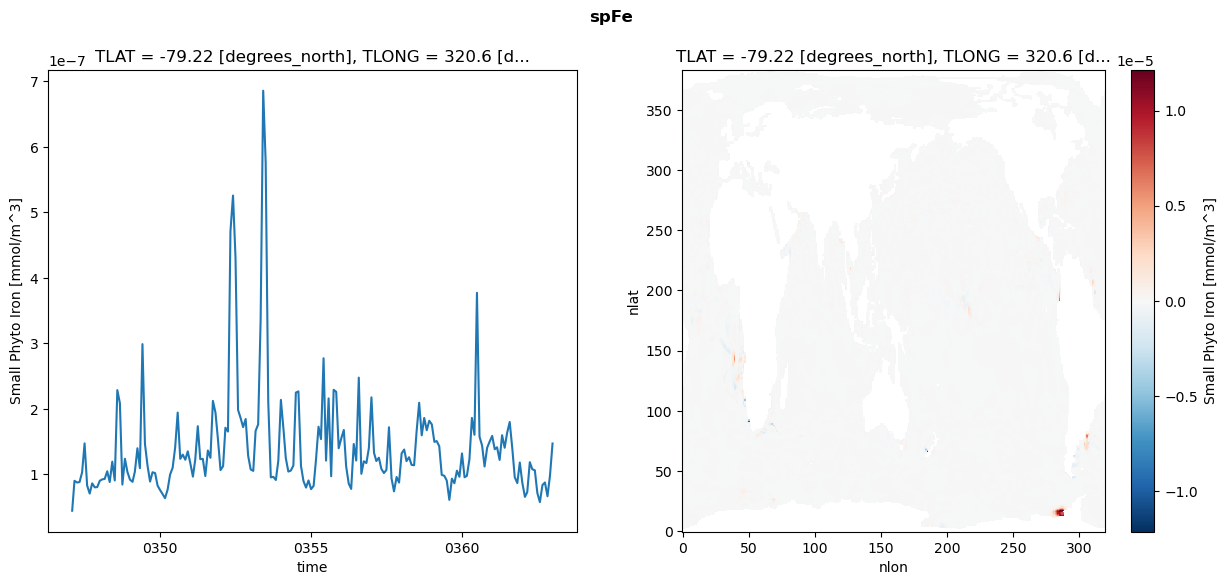

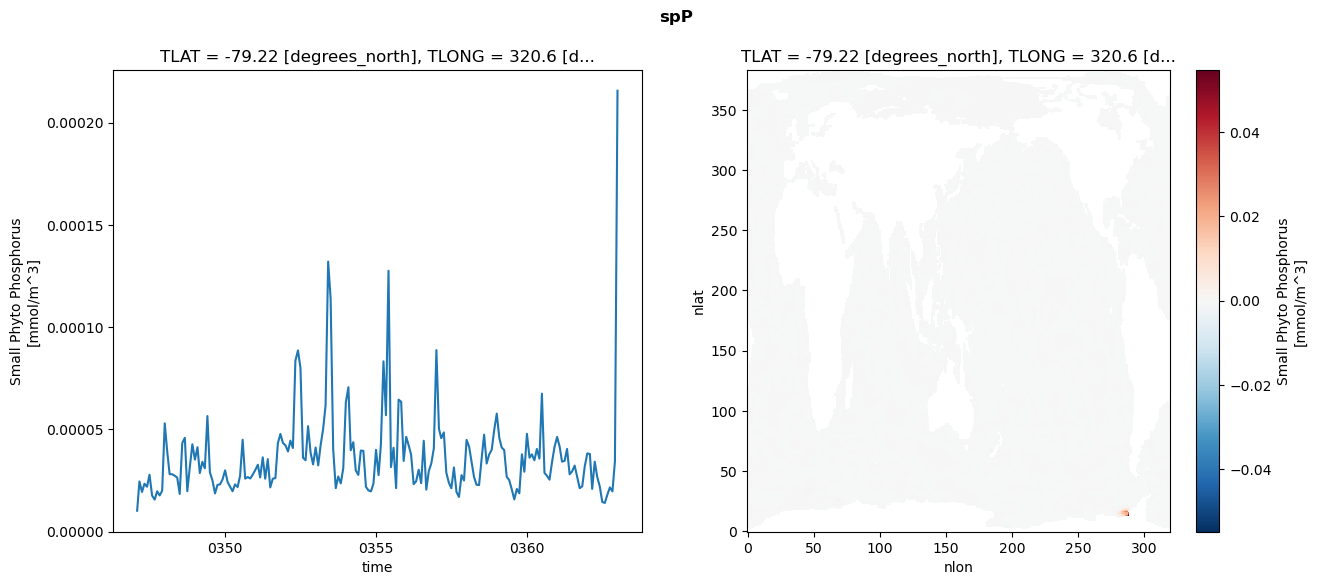

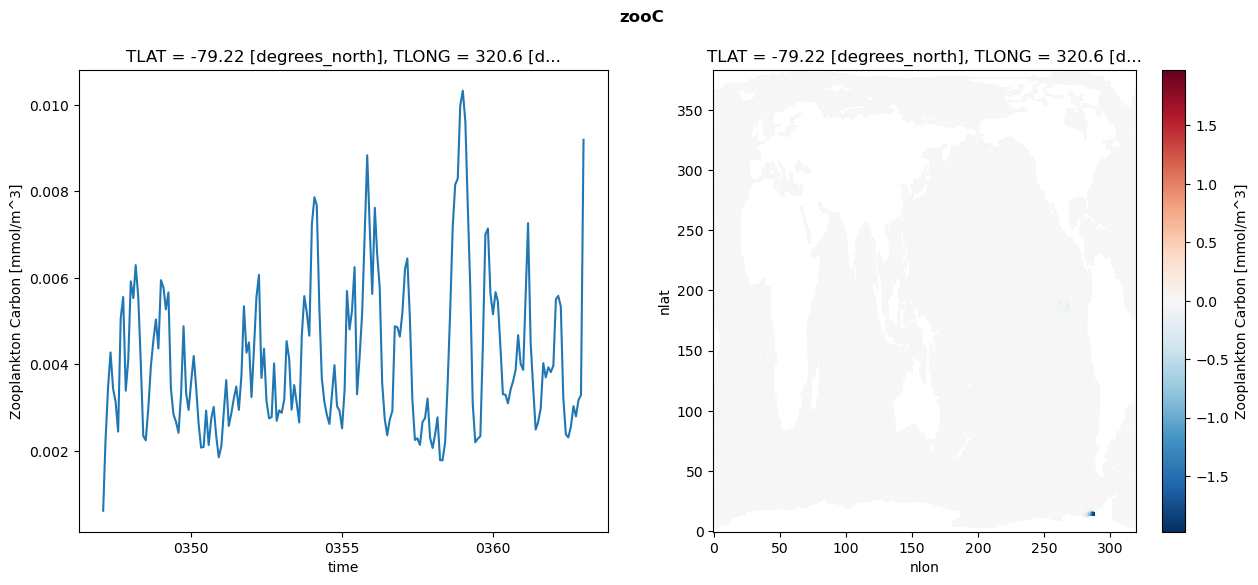

In [6]:
plt.rcParams.update({'figure.max_open_warning': 0})

for v in variables:
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))
    ds_o[f"{v}_rmse"].plot(ax=axs[0])   
    ds_o[f"{v}_diff"].plot(ax=axs[1])
    plt.suptitle(v, fontweight="bold")